 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [90]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [91]:
# Reading whale returns
whale_path = Path("whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [92]:
# Count nulls
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [93]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [133]:
# Reading algorithmic returns
algo_path = Path("algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [95]:
# Count nulls
algo_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [96]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [135]:
# Reading S&P 500 Closing Prices
sp500_path = Path("sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df = sp500_df.sort_index()
sp500_df

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [136]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [137]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str[1:]
sp500_df['Close'] = pd.to_numeric(sp500_df['Close'])
sp500_df

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [138]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [139]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.isna().sum()

Close    0
dtype: int64

In [141]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns = {"Close" : "SP500"}, inplace=True)
sp500_daily_returns

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [143]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
wasp_returns_df = pd.concat([whale_df, algo_df, sp500_daily_returns], axis="columns", join="inner")
wasp_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

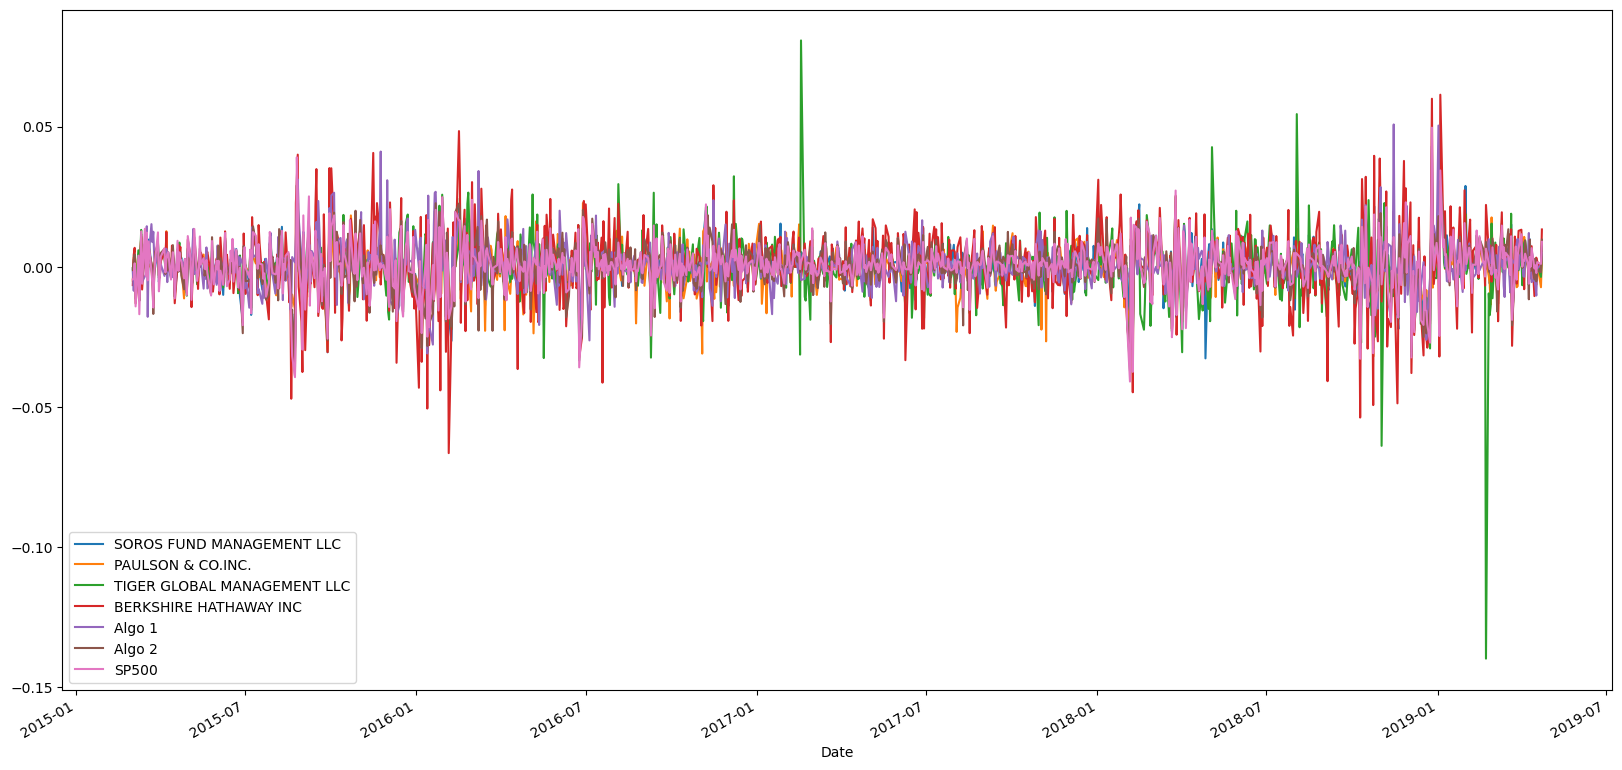

In [148]:
# Plot daily returns of all portfolios
wasp_returns_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

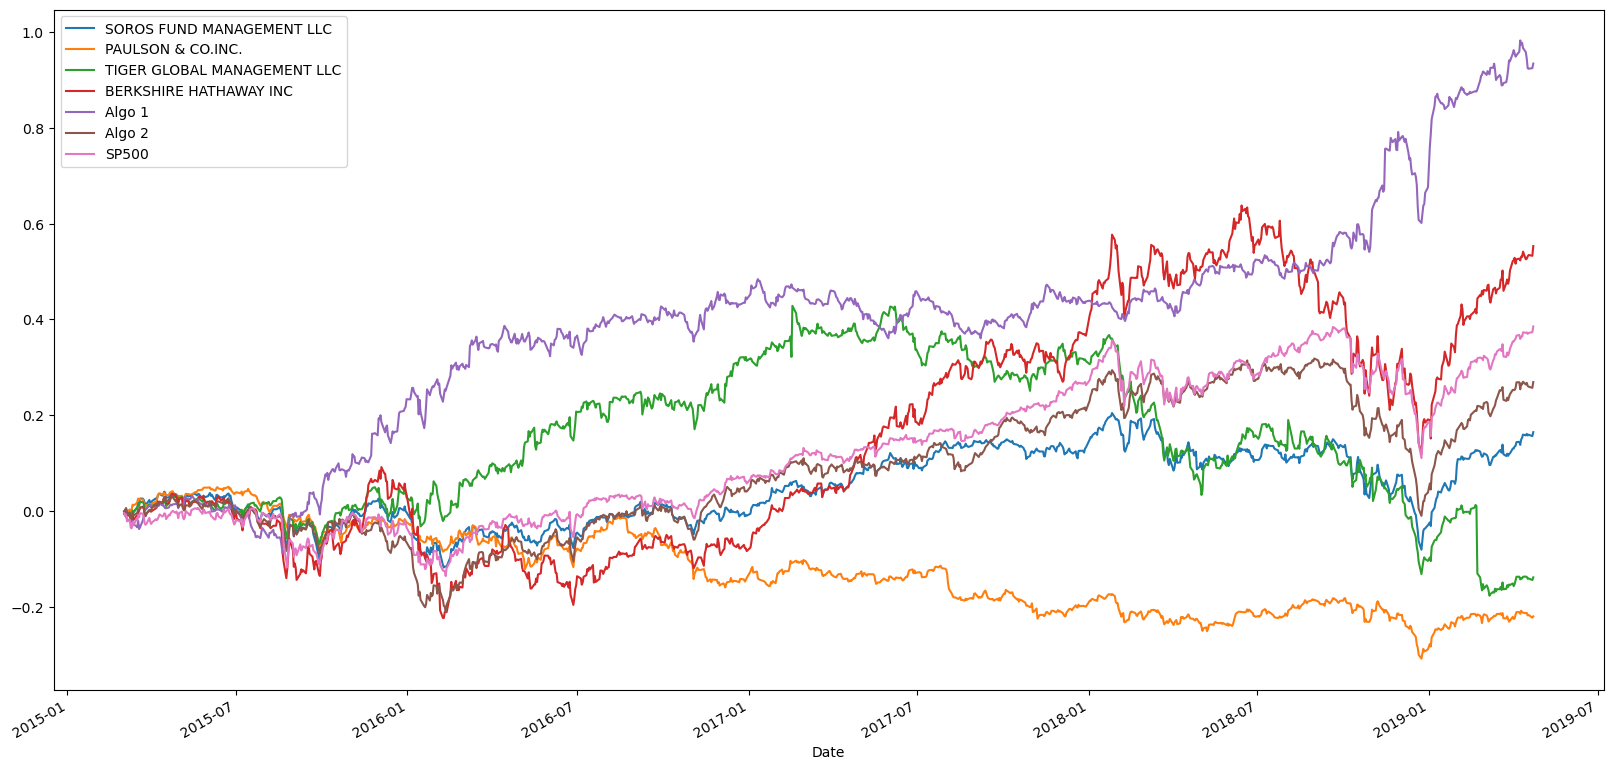

In [263]:
# Calculate cumulative returns of all portfolios
cumu_wasp_returns = (1 + wasp_returns_df).cumprod() - 1
cumu_wasp_returns

# Plot cumulative returns
cumu_wasp_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

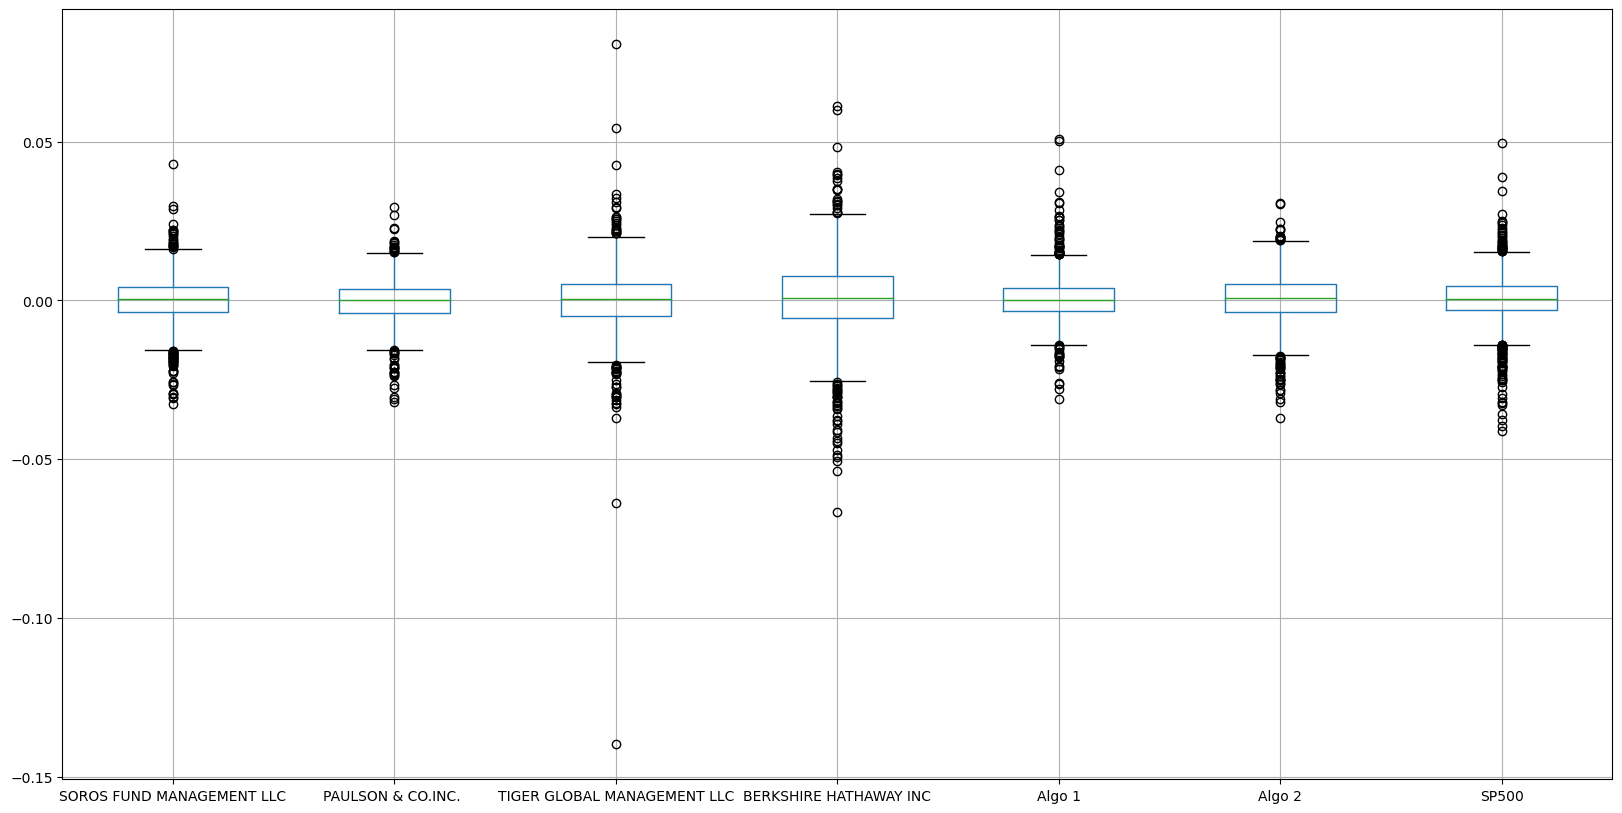

In [150]:
# Box plot to visually show risk
wasp_returns_df.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [177]:
# Calculate the daily standard deviations of all portfolios
wasp_std = wasp_returns_df.std()
wasp_std.sort_values(inplace = True)
wasp_std

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
SP500                          0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [152]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_returns.std()
# Determine which portfolios are riskier than the S&P 500
print("The following portfolios are riskier than the S&P500 (from 3/3/2015 to 4/22/2019): Tiger Global Management LLC and Berkshire Hathaway Inc.")  

The following portfolios are riskier than the S&P500 (from 3/3/2015 to 4/22/2019): Tiger Global Management LLC and Berkshire Hathaway Inc.


### Calculate the Annualized Standard Deviation

In [178]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = wasp_std * np.sqrt(252)
annualized_std.sort_values(inplace = True)
annualized_std

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
SP500                          0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

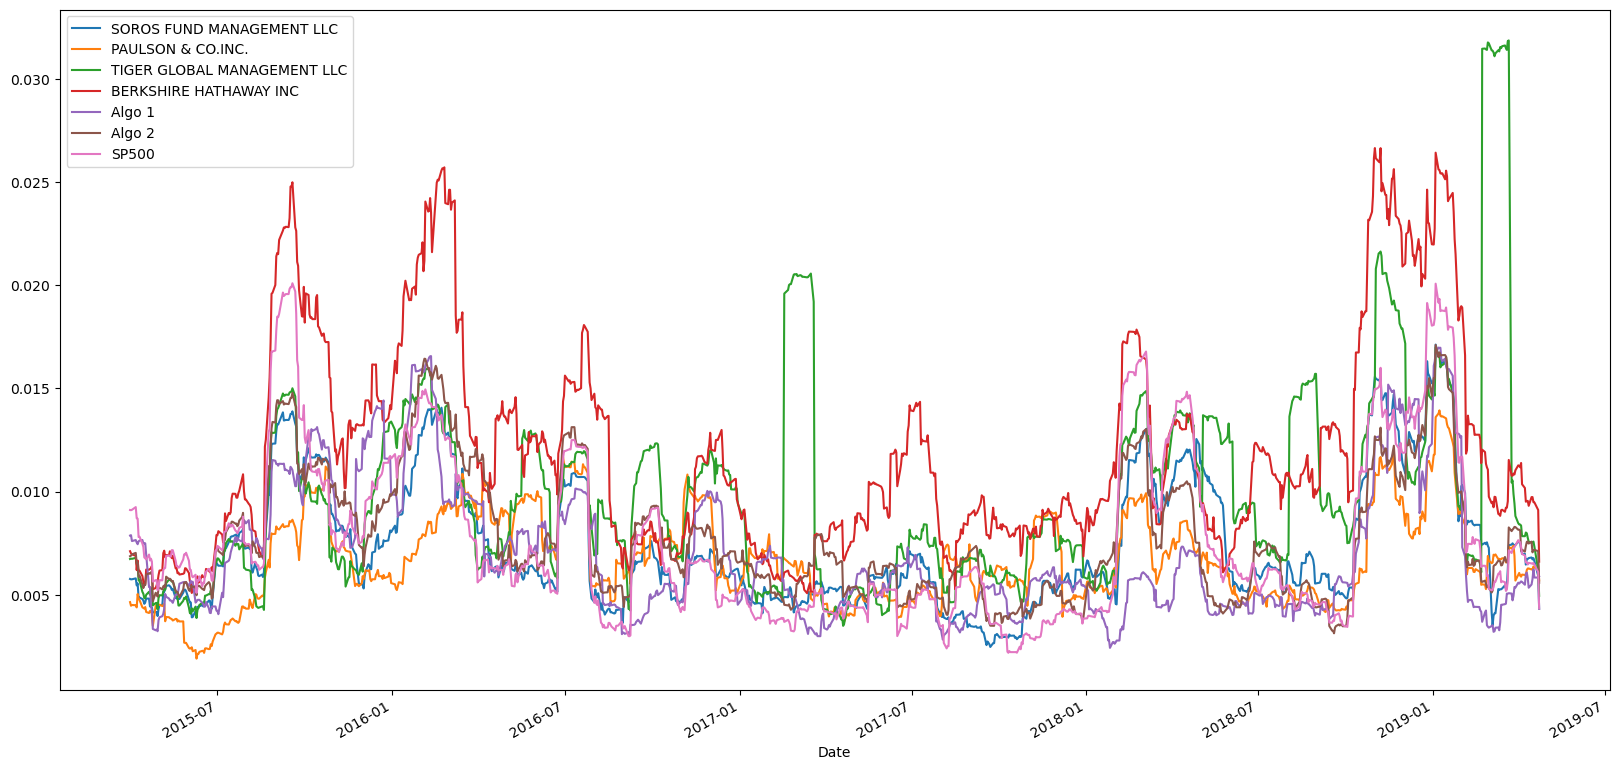

In [171]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
wasp_returns_df.rolling(window=21).std()
# Plot the rolling standard deviation
wasp_returns_df.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

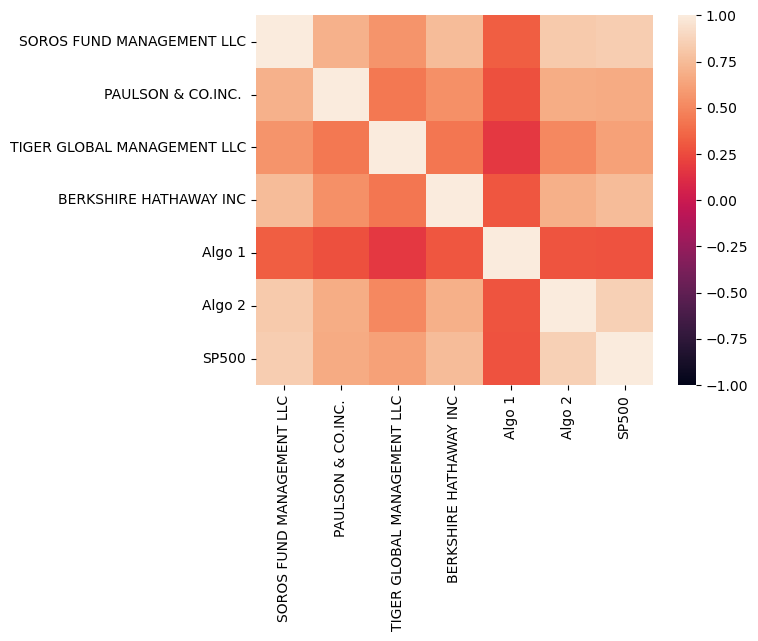

In [165]:
# Calculate the correlation
wasp_correlation = wasp_returns_df.corr()
# Display de correlation matrix
sns.heatmap(wasp_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of Berkshire Hathaway Returns vs. S&P 500 Returns'}, xlabel='Date'>

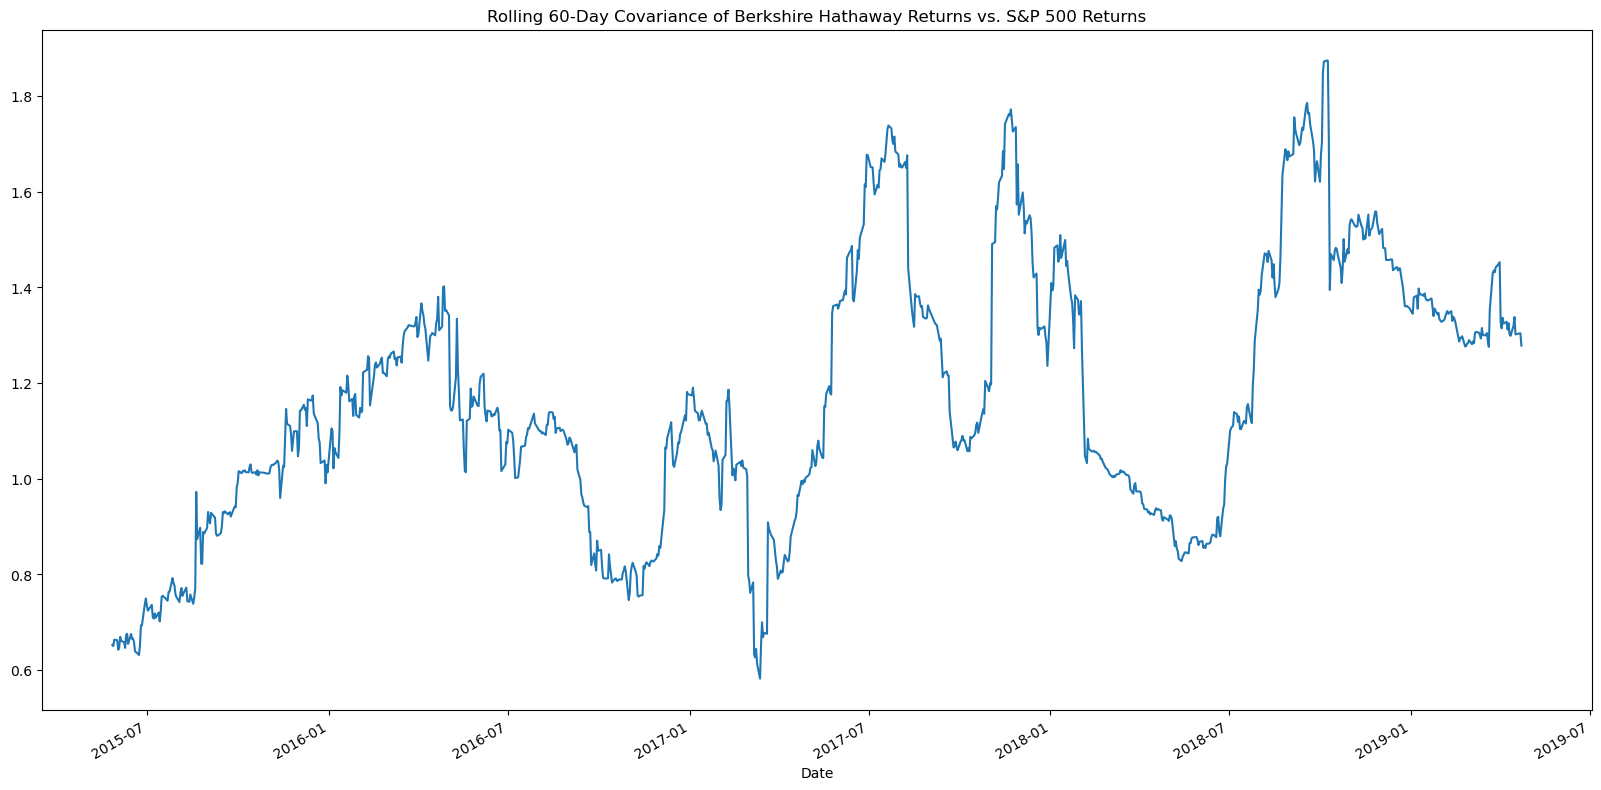

In [169]:
# Calculate covariance of a single portfolio
covariance = wasp_returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(wasp_returns_df['SP500'])
covariance
# Calculate variance of S&P 500
variance = wasp_returns_df['SP500'].rolling(window=60).var()
variance
# Computing beta
berk_beta = covariance / variance

# Plot beta trend

berk_beta.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Berkshire Hathaway Returns vs. S&P 500 Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

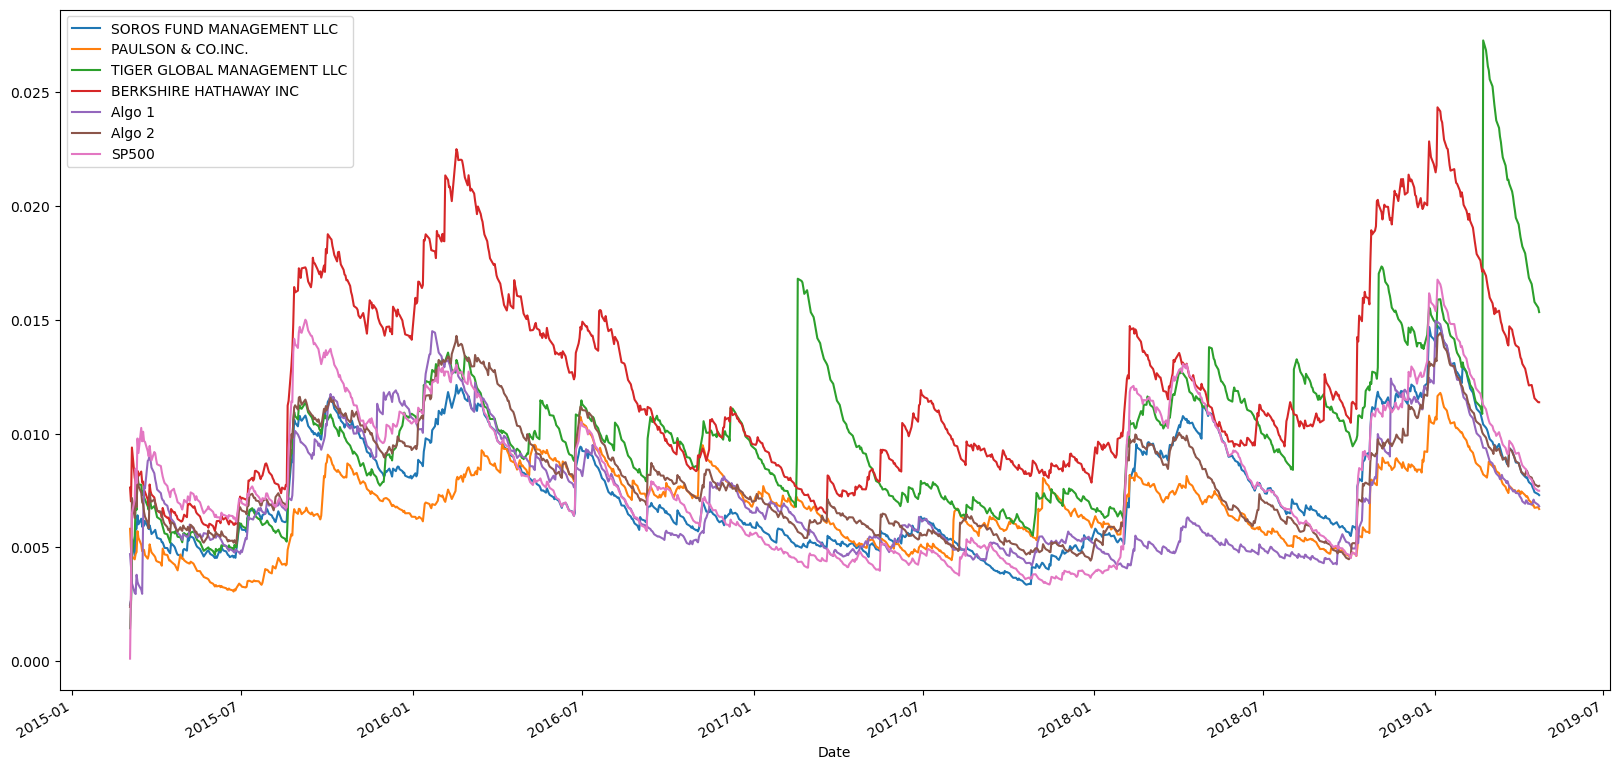

In [269]:
# Use `ewm` to calculate the rolling window
wasp_ewm_21 = wasp_returns_df.ewm(halflife=21).std()
wasp_ewm_21.plot(figsize=(20,10))

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [184]:
# Annualized Sharpe Ratios
wasp_sharpe_ratios = (wasp_returns_df.mean() * 252) / (wasp_std * np.sqrt(252))
wasp_sharpe_ratios

Algo 1                         1.378648
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
PAULSON & CO.INC.             -0.483570
SOROS FUND MANAGEMENT LLC      0.356417
SP500                          0.648267
TIGER GLOBAL MANAGEMENT LLC   -0.121060
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

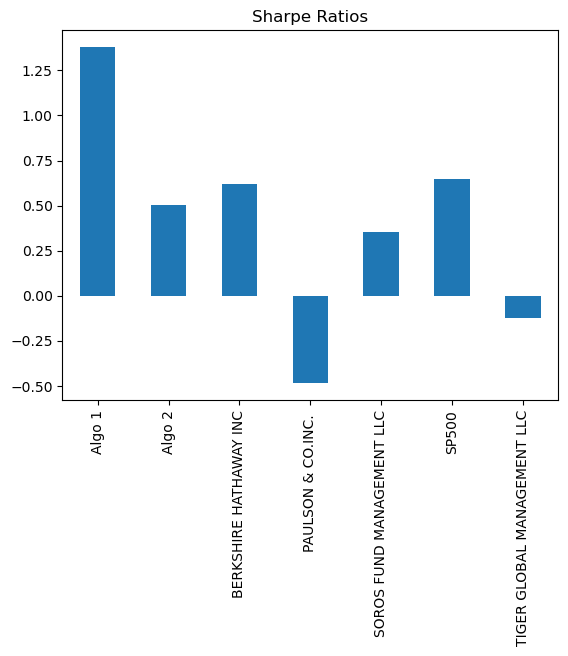

In [185]:
# Visualize the sharpe ratios as a bar plot
wasp_sharpe_ratios.plot.bar(title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 outperformed the S&P 500 as well as all of the Whale portfolios individually.  It had a lower risk portfolio and better returns than all comparables.  Algo 2, however, underperformed both the S&P 500 and Berkshire Hathaway.  It did perform better than the other three Whale portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [195]:
# Reading data from 1st stock
aapl_path = Path("aapl_historical.csv")
aapl_df = pd.read_csv(aapl_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,AAPL,186.99
2018-05-16,AAPL,188.18
2018-05-15,AAPL,186.44


In [196]:
# Reading data from 2nd stock
cost_path = Path("cost_historical.csv")
cost_df = pd.read_csv(cost_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62
...,...,...
2018-05-17,COST,199.60
2018-05-16,COST,198.71
2018-05-15,COST,195.48


In [197]:
# Reading data from 3rd stock
goog_path = Path("goog_historical.csv")
goog_df = pd.read_csv(goog_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40
...,...,...
2018-05-17,GOOG,1078.59
2018-05-16,GOOG,1081.77
2018-05-15,GOOG,1079.23


In [212]:
# Combine all stocks in a single DataFrame
comb_stock_df = pd.concat([aapl_df, cost_df, goog_df], axis="columns", join="inner")
comb_stock_df

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,COST,243.47,GOOG,1162.38
2019-05-08,AAPL,202.90,COST,241.34,GOOG,1166.27
2019-05-07,AAPL,202.86,COST,240.18,GOOG,1174.10
2019-05-06,AAPL,208.48,COST,244.23,GOOG,1189.39
2019-05-03,AAPL,211.75,COST,244.62,GOOG,1185.40
...,...,...,...,...,...,...
2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59
2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23


In [213]:
# Reset Date index
comb_stock_df = comb_stock_df.sort_index()
comb_stock_df

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,AAPL,188.59,COST,195.76,GOOG,1098.26
2018-05-14,AAPL,188.15,COST,195.88,GOOG,1100.20
2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23
2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59
...,...,...,...,...,...,...
2019-05-03,AAPL,211.75,COST,244.62,GOOG,1185.40
2019-05-06,AAPL,208.48,COST,244.23,GOOG,1189.39
2019-05-07,AAPL,202.86,COST,240.18,GOOG,1174.10


In [214]:
# Reorganize portfolio data by having a column per symbol
comb_stock_df.drop(columns = 'Symbol', inplace=True)
comb_stock_df.columns = ['AAPL', 'COST', 'GOOG']
comb_stock_df

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [219]:
# Calculate daily returns
comb_daily_returns = comb_stock_df.pct_change()
# Drop NAs
comb_daily_returns.dropna(inplace=True)
# Display sample data
comb_daily_returns.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [241]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_ave_return = comb_daily_returns.dot(weights)
weighted_ave_return.columns = ['CUSTOM PORTFOLIO']

# Display sample data
weighted_ave_return

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [248]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([wasp_returns_df, weighted_ave_return], axis="columns", join="inner")
all_returns.rename(columns={all_returns.columns[7]:'CUSTOM'}, inplace=True)
all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,CUSTOM
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


In [249]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
#all_returns.dropna(inplace=True)
all_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500                          0
CUSTOM                         0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [250]:
# Calculate the annualized `std`
all_std = all_returns.std()
all_annualized_std = all_std * np.sqrt(252)
all_annualized_std.sort_values(inplace = True)
all_annualized_std

PAULSON & CO.INC.              0.116732
Algo 1                         0.133704
Algo 2                         0.139556
SOROS FUND MANAGEMENT LLC      0.146675
SP500                          0.152054
CUSTOM                         0.211496
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

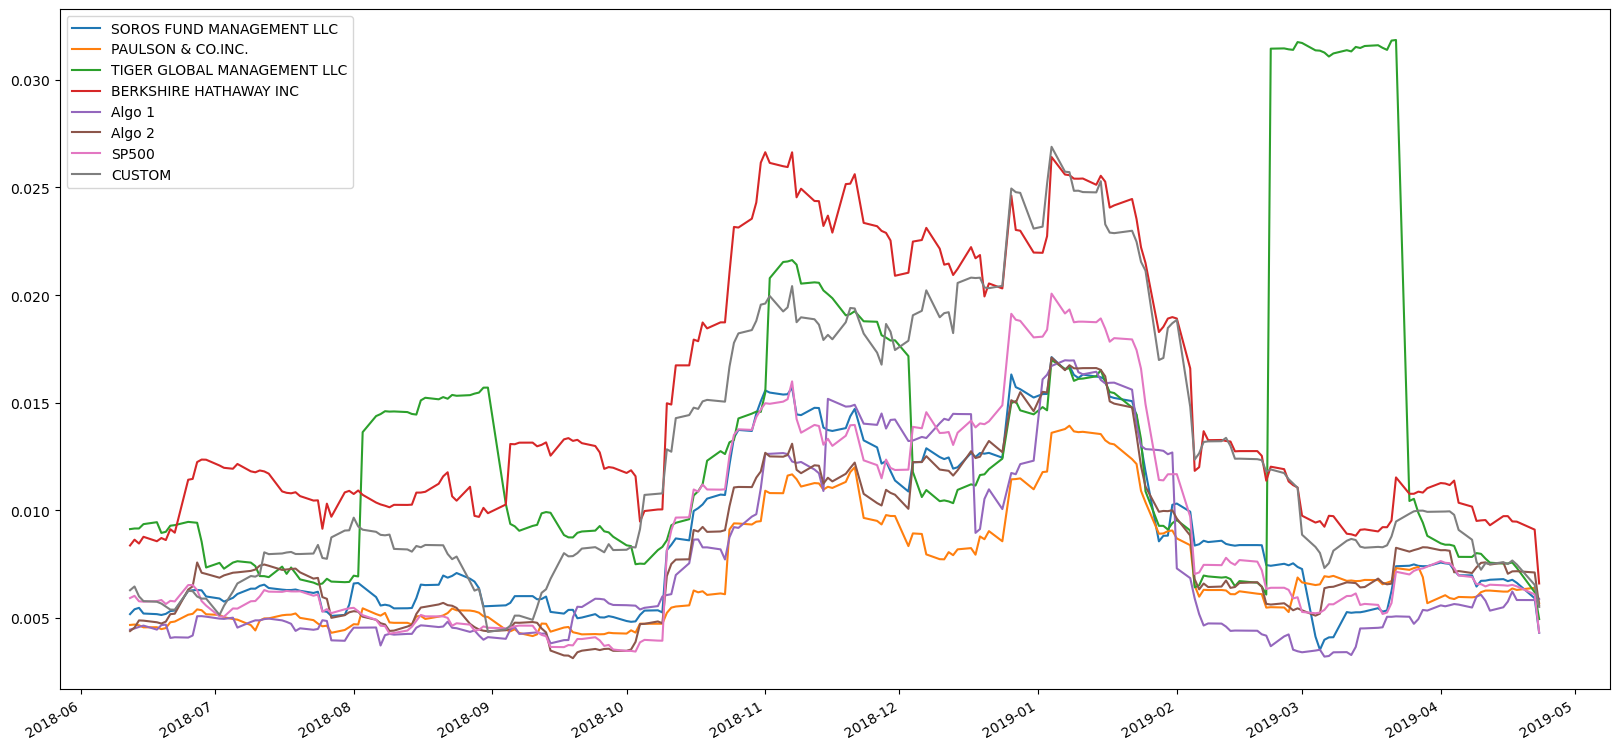

In [251]:
# Calculate rolling standard deviation
all_21_std = all_returns.rolling(window=21).std()
# Plot rolling standard deviation
all_21_std.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

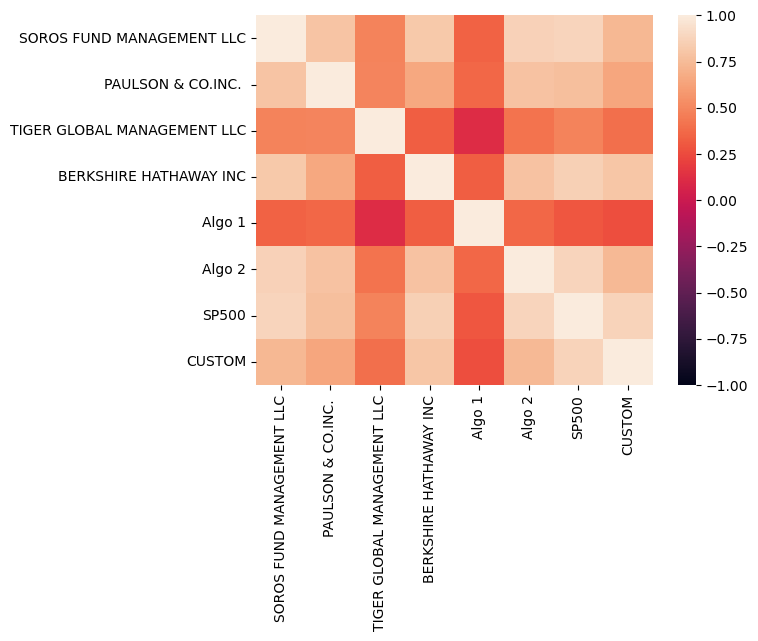

In [252]:
# Calculate and plot the correlation
all_correlation = all_returns.corr()
# Display de correlation matrix
sns.heatmap(all_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of Custom Portfoliio vs. S&P 500 Returns'}>

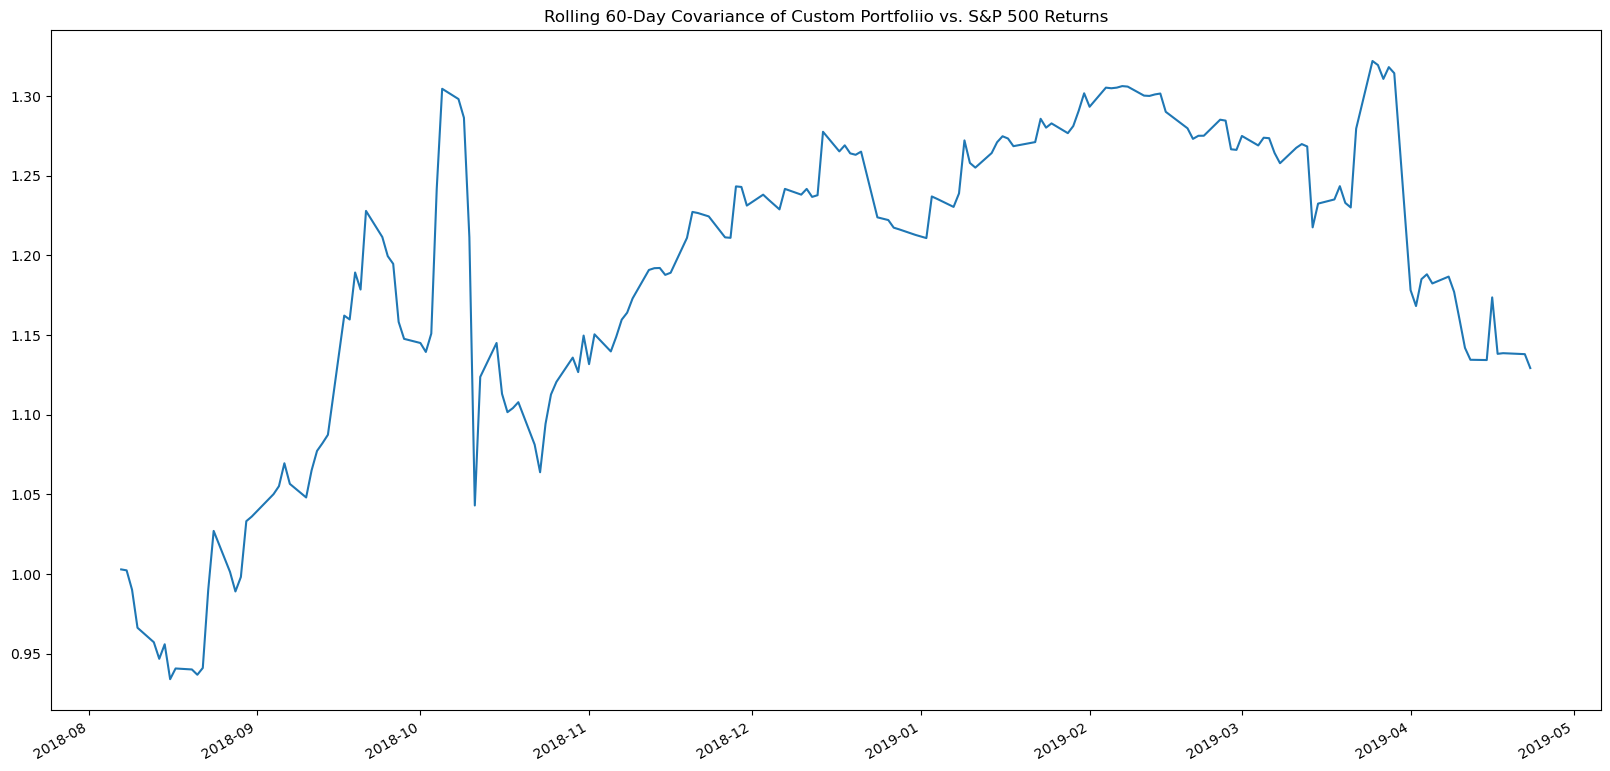

In [257]:
# Calculate and plot Beta
covariance = all_returns['CUSTOM'].rolling(window=60).cov(all_returns['SP500'])

variance = all_returns['SP500'].rolling(window=60).var()

# Computing beta
custom_beta = covariance / variance

# Plot beta trend
custom_beta.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Custom Portfoliio vs. S&P 500 Returns')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [258]:
# Calculate Annualized Sharpe Ratios
all_sharpe_ratios = (all_returns.mean() * 252) / (all_std * np.sqrt(252))
all_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
SP500                          0.584820
CUSTOM                         0.933123
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of ALL Portfolios'}>

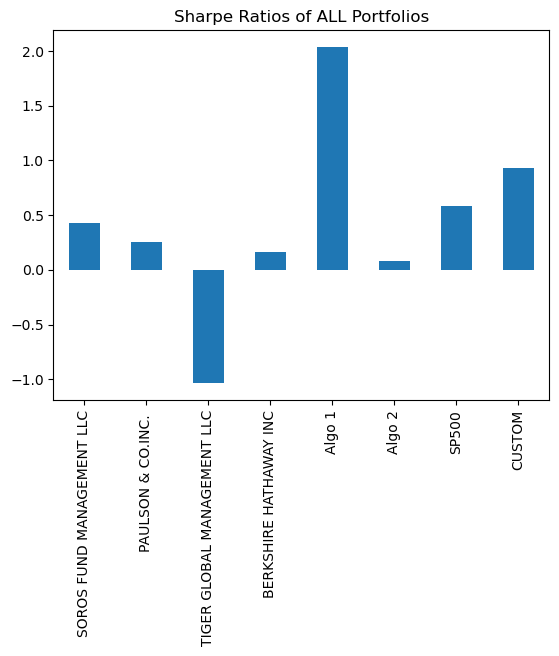

In [259]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot.bar(title='Sharpe Ratios of ALL Portfolios')

### How does your portfolio do?

The custom portfolio of equal shares AAPL, COST, GOOG outperformed all other portfolios, with the exception of underperforming compared to Algo 1, on a risk-adjusted return basis over the period analyzed. I would be very happy with this result.